# Experiments with the diffusion equation

Basically using the latent-space regression idea on a simple physical system. Only `V` (the total 'volume' of the diffusing quantity) changes between samples. `H_0` could also be varied.

In [98]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl

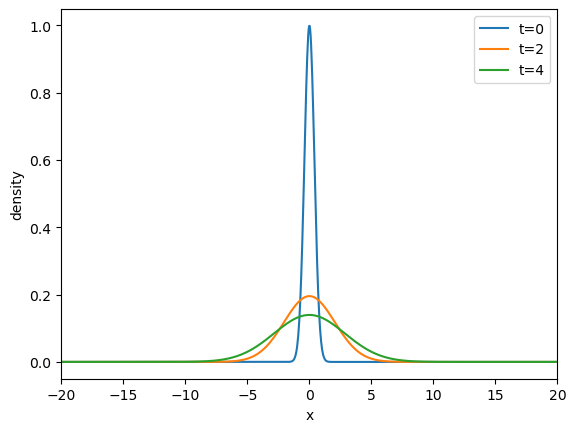

1.0
1.0
0.9999999999974705


In [99]:
def diffusion(x, t, D, V, H_0):
    w_0 = (V**2)/(2*np.pi*H_0**2)
    S = (2*np.pi*H_0**2)/V
    w = np.sqrt(w_0 + 2*D*t)

    return ((S*w_0)/(w*np.sqrt(2*np.pi)))*np.exp(-(x**2)/(2*w**2))

x = np.linspace(-20, 20, 1000)
y_0 = diffusion(x, 0, 1, 1, 1)
y_2 = diffusion(x, 2, 1, 1, 1)
y_4 = diffusion(x, 4, 1, 1, 1)

plt.plot(x, y_0, label='t=0')
plt.plot(x, y_2, label='t=2')
plt.plot(x, y_4, label='t=4')
plt.xlabel('x')
plt.ylabel('density')
plt.xlim(-20, 20)
plt.legend()
plt.show()

print(np.trapz(y_0, x))
print(np.trapz(y_2, x))
print(np.trapz(y_4, x))

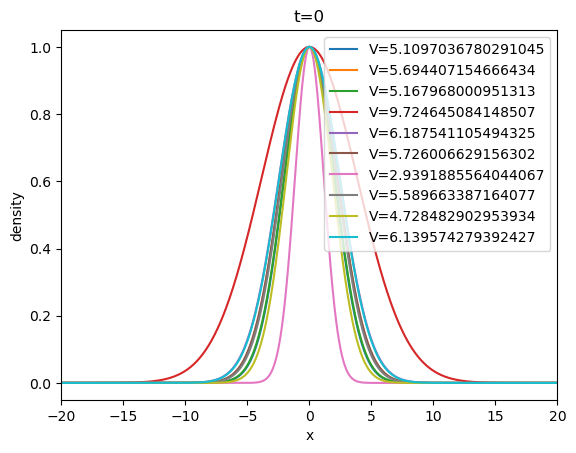

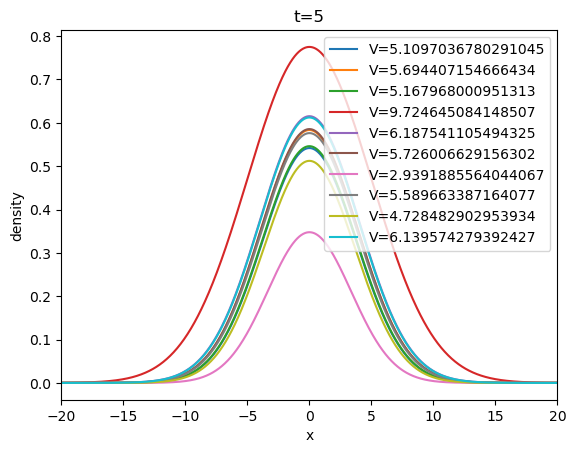

In [100]:
n_features = 1000
n_targets = n_features

x = np.linspace(-20, 20, n_features)

# displaying the first 10 samples of x_train
rng = np.random.default_rng(seed=99)
V_arr = rng.uniform(0.1, 10, 10)

plt.figure()
for V in V_arr:
    y_0 = diffusion(x = x, t = 0, D = 1, V = V, H_0 = 1)
    plt.plot(x, y_0, label=f'V={V}')
plt.xlabel('x')
plt.ylabel('density')
plt.title('t=0')
plt.xlim(-20, 20)
plt.legend()
plt.show()

# displaying the first 10 samples of y_train

plt.figure()
for V in V_arr:
    y_0 = diffusion(x = x, t = 5, D = 1, V = V, H_0 = 1)
    plt.plot(x, y_0, label=f'V={V}')
plt.xlabel('x')
plt.ylabel('density')
plt.title('t=5')
plt.xlim(-20, 20)
plt.legend()
plt.show()


In [101]:
# compile x_train and y_train. shapes are (n_samples, n_features) and (n_samples, n_targets) respectively

n_samples_train = 100
x_train = np.zeros((n_samples_train, n_features))
y_train = np.zeros((n_samples_train, n_targets))

rng = np.random.default_rng(seed=99)
V_arr_train = rng.uniform(0.1, 10, n_samples_train)

for i in range(n_samples_train):
    x_train[i, :] = diffusion(x = x, t = 0, D = 1, V = V_arr_train[i], H_0 = 1)
    y_train[i, :] = diffusion(x = x, t = 5, D = 1, V = V_arr_train[i], H_0 = 1)

Text(0.5, 1.0, 'y_train')

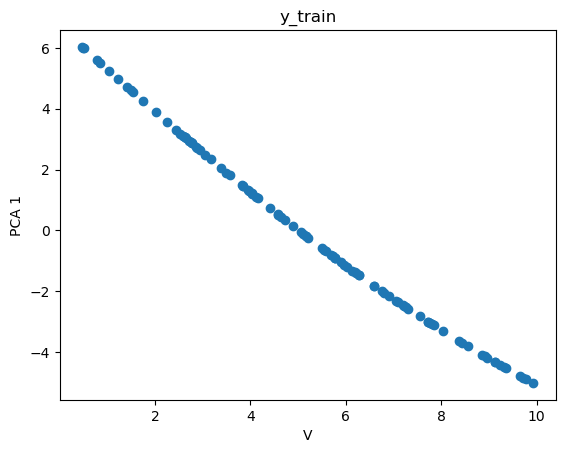

In [102]:
from sklearn.decomposition import PCA

low_dim_x = 5
low_dim_y = 1

PCA_model_x = PCA(n_components=low_dim_x)
x_train_lowdim = PCA_model_x.fit_transform(x_train)

if low_dim_x == 2:
    plt.figure()
    plt.scatter(x_train_lowdim[:, 0], x_train_lowdim[:, 1])
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.title('x_train')

PCA_model_y = PCA(n_components=low_dim_y)
y_train_lowdim = PCA_model_y.fit_transform(y_train)

plt.figure()
plt.scatter(V_arr_train, y_train_lowdim[:, 0])
plt.xlabel('V')
plt.ylabel('PCA 1')
plt.title('y_train')

# each dot represents a sample scenario with a different V value

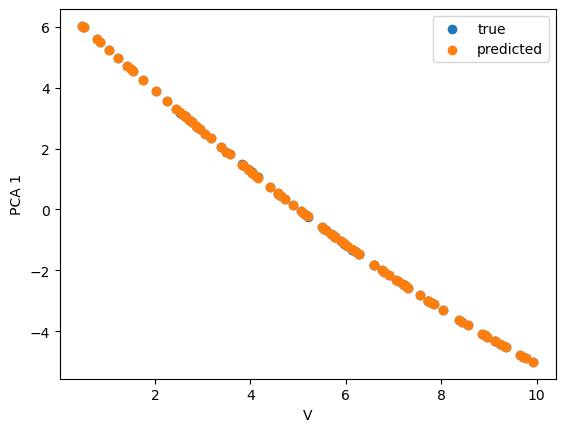

In [103]:
'''
using linear regression for the latent space regression right now

TODO: 
- use a GP
- figure out how to use a 2d latent space for the transformed y_train (what alternatives are there to the multi-output GP?)
'''

from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(x_train_lowdim, y_train_lowdim)
y_train_lowdim_pred = reg.predict(x_train_lowdim)

plt.figure()
plt.scatter(V_arr_train, y_train_lowdim[:, 0], label='true')
plt.scatter(V_arr_train, y_train_lowdim_pred[:, 0], label='predicted')
plt.xlabel('V')
plt.ylabel('PCA 1')
plt.legend()

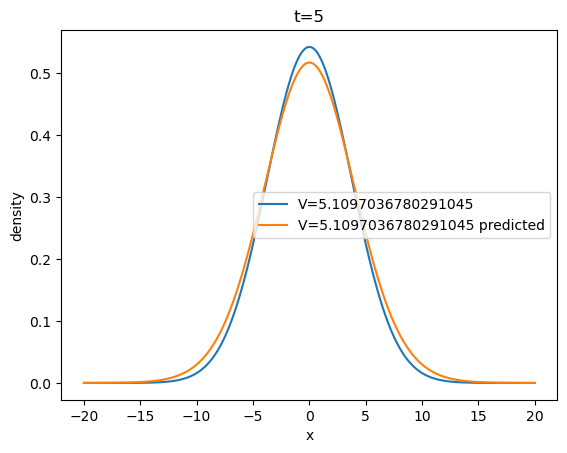

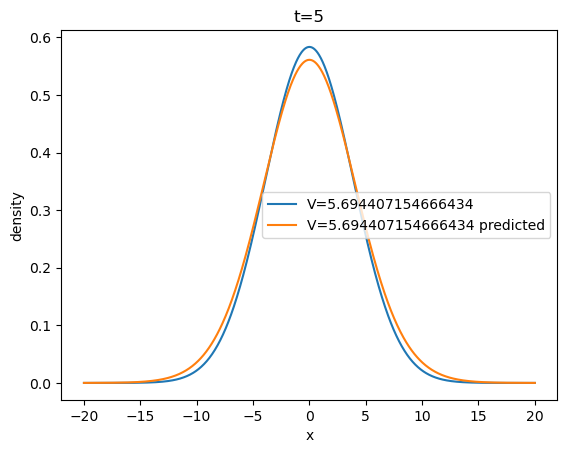

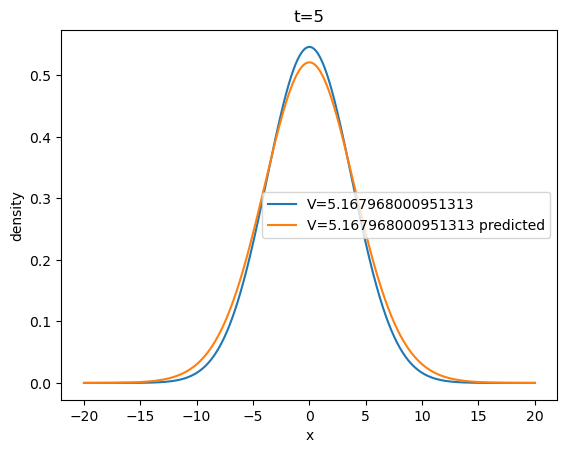

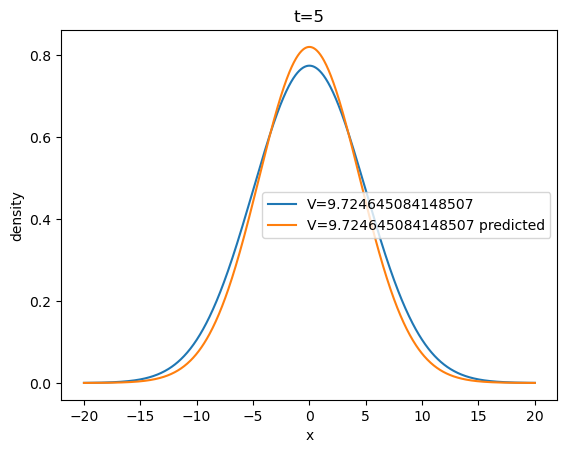

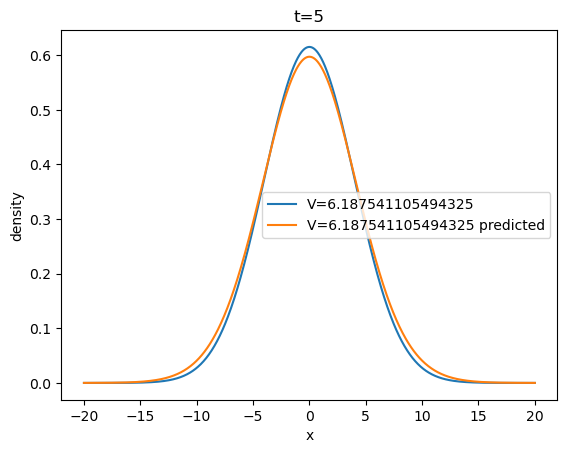

In [104]:
y_train_pred = PCA_model_y.inverse_transform(y_train_lowdim_pred)

for i in range(n_samples_train)[:5]:
    plt.figure()
    plt.plot(x, y_train[i, :], label=f'V={V_arr_train[i]}')
    plt.plot(x, y_train_pred[i, :], label=f'V={V_arr_train[i]} predicted')
    plt.xlabel('x')
    plt.ylabel('density')
    plt.title('t=5')
    plt.legend()
    plt.show()


# Testing

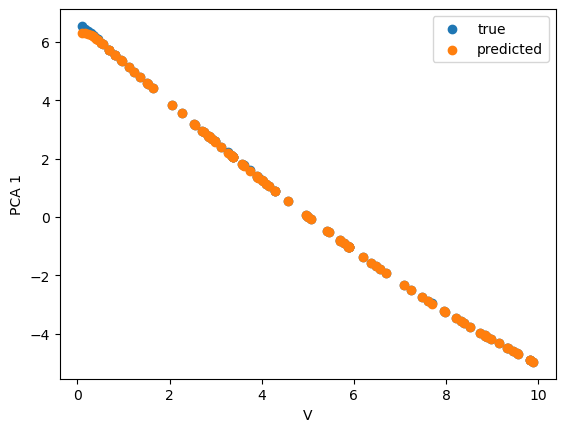

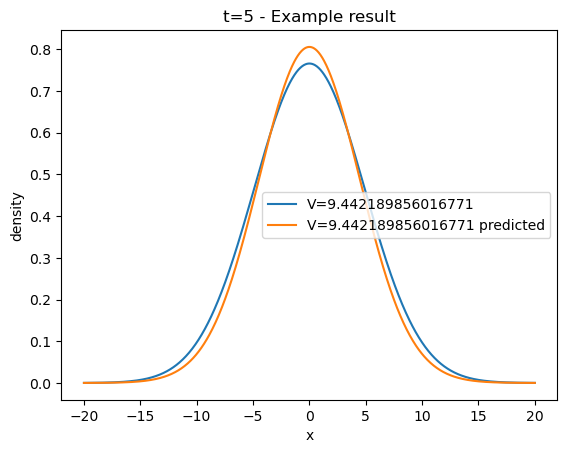

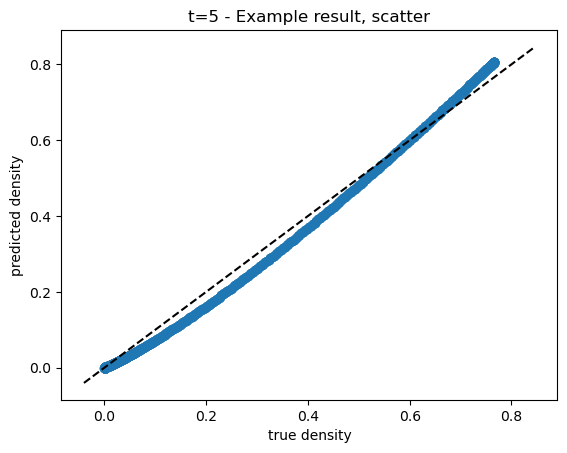

index 83 was the worst result with an MSE of 0.0012663145605710123 for V=0.10797687854078881


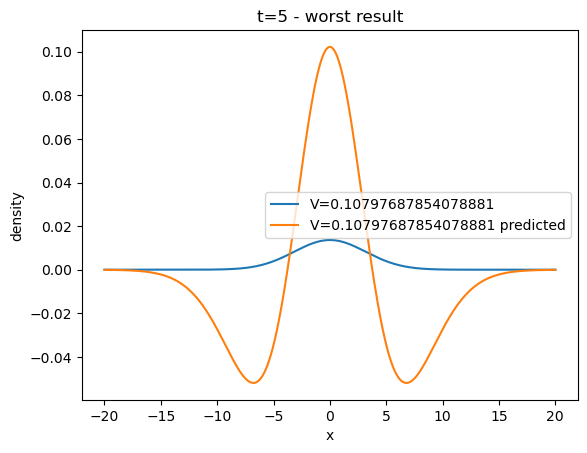

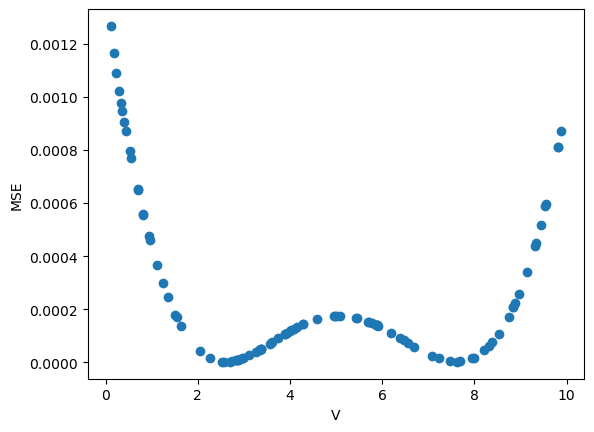

index 83 was the worst result with a diffusion loss of 1.8585735808300843 for V=0.10797687854078881


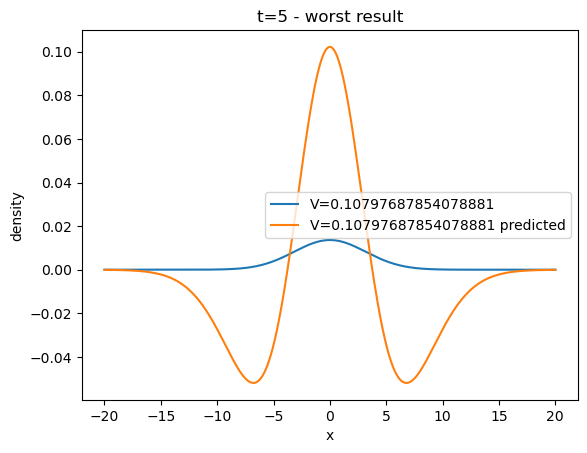

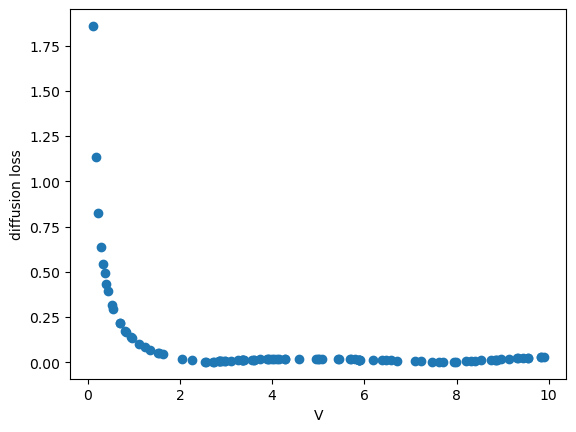

In [114]:
# compile x_test and y_test - visually evaluate the model

n_samples_test = 100
x_test = np.zeros((n_samples_test, n_features))
y_test = np.zeros((n_samples_test, n_targets))

rng = np.random.default_rng(seed=98)
V_arr_test = rng.uniform(0.1, 10, n_samples_test)

for i in range(n_samples_test):
    x_test[i, :] = diffusion(x = x, t = 0, D = 1, V = V_arr_test[i], H_0 = 1)
    y_test[i, :] = diffusion(x = x, t = 5, D = 1, V = V_arr_test[i], H_0 = 1)

x_test_lowdim = PCA_model_x.transform(x_test)
y_test_lowdim = PCA_model_y.transform(y_test)
y_test_lowdim_pred = reg.predict(x_test_lowdim)

plt.figure()
plt.scatter(V_arr_test, y_test_lowdim[:, 0], label='true')
plt.scatter(V_arr_test, y_test_lowdim_pred[:, 0], label='predicted')
plt.xlabel('V')
plt.ylabel('PCA 1')
plt.legend()
plt.show()

y_test_pred = PCA_model_y.inverse_transform(y_test_lowdim_pred)

for i in range(n_samples_test)[:1]:
    plt.figure()
    plt.plot(x, y_test[i, :], label=f'V={V_arr_test[i]}')
    plt.plot(x, y_test_pred[i, :], label=f'V={V_arr_test[i]} predicted')
    plt.xlabel('x')
    plt.ylabel('density')
    plt.title('t=5 - Example result')
    plt.legend()
    plt.show()

    plt.figure()
    ax = plt.gca()
    plt.scatter(y_test[i, :], y_test_pred[i, :])
    plt.plot(np.linspace(min(ax.get_xlim()[0], ax.get_ylim()[0]), max(ax.get_xlim()[1], ax.get_ylim()[1]), num=2), np.linspace(min(ax.get_xlim()[0], ax.get_ylim()[0]), max(ax.get_xlim()[1], ax.get_ylim()[1]), num=2), linestyle='--', color='black')
    plt.xlabel('true density')
    plt.ylabel('predicted density')
    plt.title('t=5 - Example result, scatter')
    plt.show()

# numerically evaluate the model

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test.T, y_test_pred.T, multioutput='raw_values')
worst_index_mse = int(np.where(mse == np.max(mse))[0])
print(f'index {worst_index_mse} was the worst result with an MSE of {mse[worst_index_mse]} for V={V_arr_test[worst_index_mse]}')

plt.figure()
plt.plot(x, y_test[worst_index_mse, :], label=f'V={V_arr_test[worst_index_mse]}')
plt.plot(x, y_test_pred[worst_index_mse, :], label=f'V={V_arr_test[worst_index_mse]} predicted')
plt.xlabel('x')
plt.ylabel('density')
plt.title('t=5 - worst result')
plt.legend()
plt.show()

plt.figure()
plt.scatter(V_arr_test, mse)
plt.xlabel('V')
plt.ylabel('MSE')
plt.show()

# custom metric for this problem
def diffusion_loss(y_true, y_pred):
    # my custom loss function for the diffusion example, it's an MAE normalised by the maximum value of the true density
    # input shapes are (n_samples, n_targets)
    max_y_true = np.max(y_true, axis=1)
    return np.mean(np.abs(y_true - y_pred), axis=1)/max_y_true

diffloss = diffusion_loss(y_test, y_test_pred)
worst_index_diffloss = int(np.where(diffloss == np.max(diffloss))[0])
print(f'index {worst_index_diffloss} was the worst result with a diffusion loss of {diffloss[worst_index_diffloss]} for V={V_arr_test[worst_index_diffloss]}')

plt.figure()
plt.plot(x, y_test[worst_index_diffloss, :], label=f'V={V_arr_test[worst_index_diffloss]}')
plt.plot(x, y_test_pred[worst_index_diffloss, :], label=f'V={V_arr_test[worst_index_diffloss]} predicted')
plt.xlabel('x')
plt.ylabel('density')
plt.title('t=5 - worst result')
plt.legend()
plt.show()

plt.figure()
plt.scatter(V_arr_test, diffloss)
plt.xlabel('V')
plt.ylabel('diffusion loss')
plt.show()